<a href="https://colab.research.google.com/github/SHREEMATHI-S/House-price/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
from google.colab import files
uploads1 = files.upload()

Saving data.csv to data.csv


In [3]:
import io

# Load each file into a pandas DataFrame using the uploaded content
ds = pd.read_csv(io.BytesIO(uploads1['data.csv']))

In [4]:
df = pd.read_csv(io.BytesIO(uploads1['data.csv']))
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df['Total_room'] = df['bedrooms'] + df['bathrooms']
df['Total_sqfeet'] = df['sqft_above'] + df['sqft_basement']
# Dropping 'City' and 'Country' columns
df = df.drop(columns=['sqft_lot', 'floors','waterfront','view','street','statezip','date','yr_built','yr_renovated','bedrooms','bathrooms','sqft_basement','sqft_above'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4600 non-null   float64
 1   sqft_living   4600 non-null   int64  
 2   condition     4600 non-null   int64  
 3   city          4600 non-null   object 
 4   country       4600 non-null   object 
 5   Total_room    4600 non-null   float64
 6   Total_sqfeet  4600 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 251.7+ KB


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df_one_hot = pd.get_dummies(df[['city','country']])
# Drop original 'City' and 'Education' columns
df.drop(['city','country'], axis=1, inplace=True)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, df_one_hot], axis=1)

print(df)

             price  sqft_living  condition  Total_room  Total_sqfeet  \
0     3.130000e+05         1340          3        4.50          1340   
1     2.384000e+06         3650          5        7.50          3650   
2     3.420000e+05         1930          4        5.00          1930   
3     4.200000e+05         2000          4        5.25          2000   
4     5.500000e+05         1940          4        6.50          1940   
...            ...          ...        ...         ...           ...   
4595  3.081667e+05         1510          4        4.75          1510   
4596  5.343333e+05         1460          3        5.50          1460   
4597  4.169042e+05         3010          3        5.50          3010   
4598  2.034000e+05         2090          3        6.00          2090   
4599  2.206000e+05         1490          4        5.50          1490   

      city_Algona  city_Auburn  city_Beaux Arts Village  city_Bellevue  \
0           False        False                    False      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     4600 non-null   float64
 1   sqft_living               4600 non-null   int64  
 2   condition                 4600 non-null   int64  
 3   Total_room                4600 non-null   float64
 4   Total_sqfeet              4600 non-null   int64  
 5   city_Algona               4600 non-null   bool   
 6   city_Auburn               4600 non-null   bool   
 7   city_Beaux Arts Village   4600 non-null   bool   
 8   city_Bellevue             4600 non-null   bool   
 9   city_Black Diamond        4600 non-null   bool   
 10  city_Bothell              4600 non-null   bool   
 11  city_Burien               4600 non-null   bool   
 12  city_Carnation            4600 non-null   bool   
 13  city_Clyde Hill           4600 non-null   bool   
 14  city_Cov

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_scaled = scaler.fit_transform(numerical_cols)

# Convert the scaled data back to a DataFrame with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols.columns)

# If you want to replace the original numerical columns with the scaled ones
df[numerical_cols.columns] = df_scaled

print(df)

         price  sqft_living  condition  Total_room  Total_sqfeet  city_Algona  \
0    -0.423864    -0.829971  -0.667112   -0.712943     -0.829971        False   
1     3.249598     1.568528   2.286416    1.301617      1.568528        False   
2    -0.372424    -0.217367   0.809652   -0.377183     -0.217367        False   
3    -0.234071    -0.144686   0.809652   -0.209303     -0.144686        False   
4    -0.003482    -0.206984   0.809652    0.630097     -0.206984        False   
...        ...          ...        ...         ...           ...          ...   
4595 -0.432437    -0.653458   0.809652   -0.545063     -0.653458        False   
4596 -0.031271    -0.705374  -0.667112   -0.041423     -0.705374        False   
4597 -0.239562     0.904009  -0.667112   -0.041423      0.904009        False   
4598 -0.618268    -0.051238  -0.667112    0.294337     -0.051238        False   
4599 -0.587759    -0.674224   0.809652   -0.041423     -0.674224        False   

      city_Auburn  city_Bea

In [9]:
df.head(5)


,price,sqft_living,condition,Total_room,Total_sqfeet,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
0,-0.423864,-0.829971,-0.667112,-0.712943,-0.829971,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,3.249598,1.568528,2.286416,1.301617,1.568528,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,-0.372424,-0.217367,0.809652,-0.377183,-0.217367,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.234071,-0.144686,0.809652,-0.209303,-0.144686,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.003482,-0.206984,0.809652,0.630097,-0.206984,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal only to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_cols:
    df = remove_outliers(df, column)

print(df)

         price  sqft_living  condition  Total_room  Total_sqfeet  city_Algona  \
0    -0.423864    -0.829971  -0.667112   -0.712943     -0.829971        False   
2    -0.372424    -0.217367   0.809652   -0.377183     -0.217367        False   
3    -0.234071    -0.144686   0.809652   -0.209303     -0.144686        False   
4    -0.003482    -0.206984   0.809652    0.630097     -0.206984        False   
5    -0.109908    -1.307594  -0.667112   -1.720223     -1.307594        False   
...        ...          ...        ...         ...           ...          ...   
4595 -0.432437    -0.653458   0.809652   -0.545063     -0.653458        False   
4596 -0.031271    -0.705374  -0.667112   -0.041423     -0.705374        False   
4597 -0.239562     0.904009  -0.667112   -0.041423      0.904009        False   
4598 -0.618268    -0.051238  -0.667112    0.294337     -0.051238        False   
4599 -0.587759    -0.674224   0.809652   -0.041423     -0.674224        False   

      city_Auburn  city_Bea

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
# Initialize the Random Forest Regressor
rf_Regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier
rf_Regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with the trained model
y_pred = rf_Regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.07
Mean Absolute Error: 0.18
R-squared: 0.50


In [13]:
import joblib
joblib.dump(rf_Regressor, 'rf_Regressor.pkl')
rf_Regressor = joblib.load('rf_Regressor.pkl')

In [14]:
num_columns =len(df.columns)
print("Number of columns:", num_columns)

Number of columns: 50


In [15]:
new_data = [[0.06, 18.0, 2.31, 0.0, 0.6, 5.0, 85.0, 1.0, 4.0, 307.0, 21.0,4.98,0.06, 18.0, 2.31, 0.0, 0.6, 5.0, 85.0, 1.0, 4.0, 307.0, 21.0, 396.90, 4.98,0.06, 18.0, 2.31, 0.0, 0.6, 5.0, 85.0, 1.0, 4.0, 307.0, 21.0, 396.90, 4.98,0.06, 18.0, 2.31, 0.0, 0.6, 5.0, 85.0, 1.0, 4.0, 307.0, 21.0]]
prediction = rf_Regressor.predict(new_data)
print(prediction)

[0.03557749]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [16]:
df.isna().sum()

,0
price,0
sqft_living,0
condition,0
Total_room,0
Total_sqfeet,0
city_Algona,0
city_Auburn,0
city_Beaux Arts Village,0
city_Bellevue,0
city_Black Diamond,0


In [17]:
df.shape

(4242, 50)

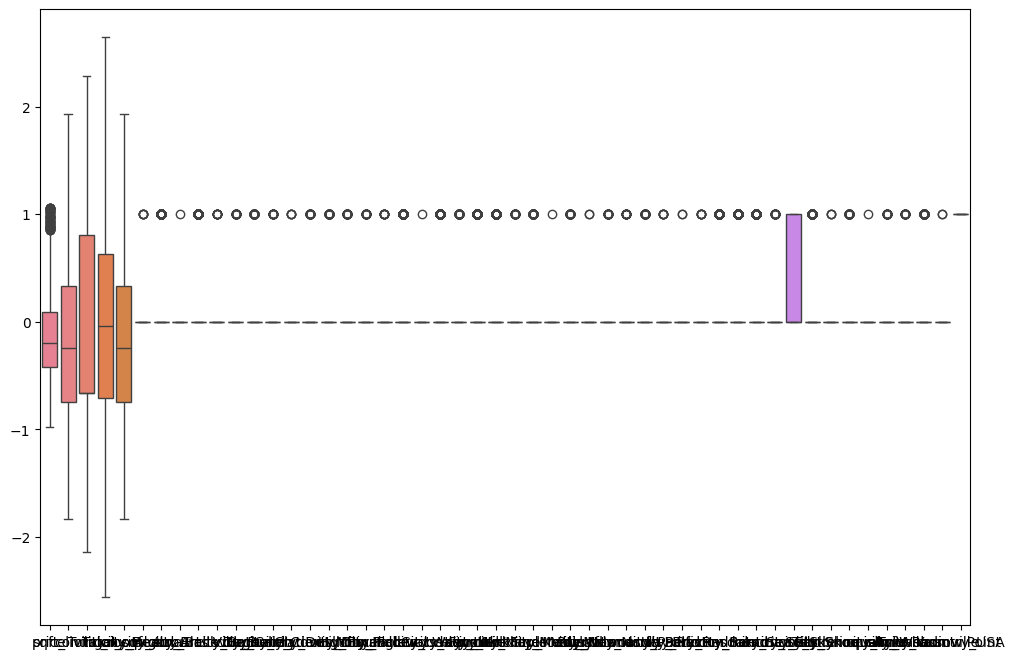

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
plt.figure(figsize=(12,8))
outlier_checker=sns.boxplot(df)
plt.show()

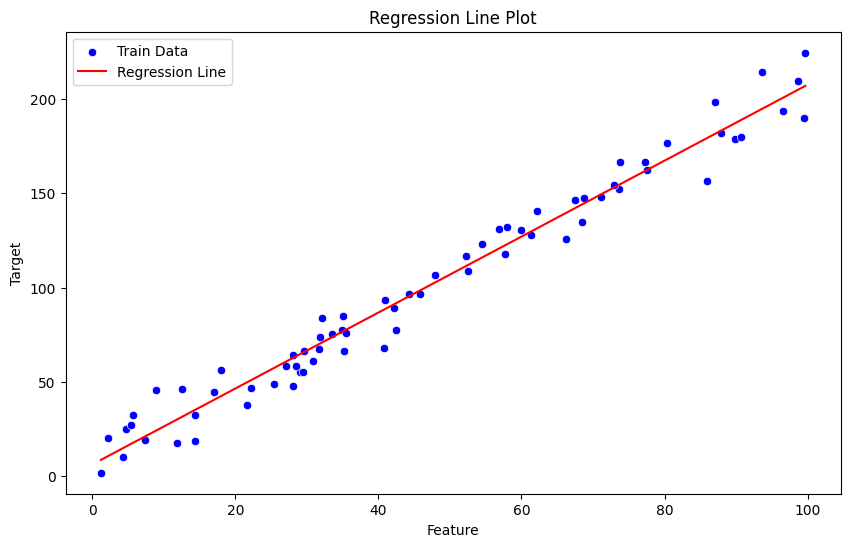

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (Replace this with your actual data)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dummy Data
x = np.random.rand(100, 1) * 100
y = 5 + 2 * x + np.random.randn(100, 1) * 10

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.ravel(), y=y_train.ravel(), color='blue', label='Train Data')
sns.lineplot(x=X_train.ravel(), y=model.predict(X_train).ravel(), color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression Line Plot')
plt.legend()
plt.show()

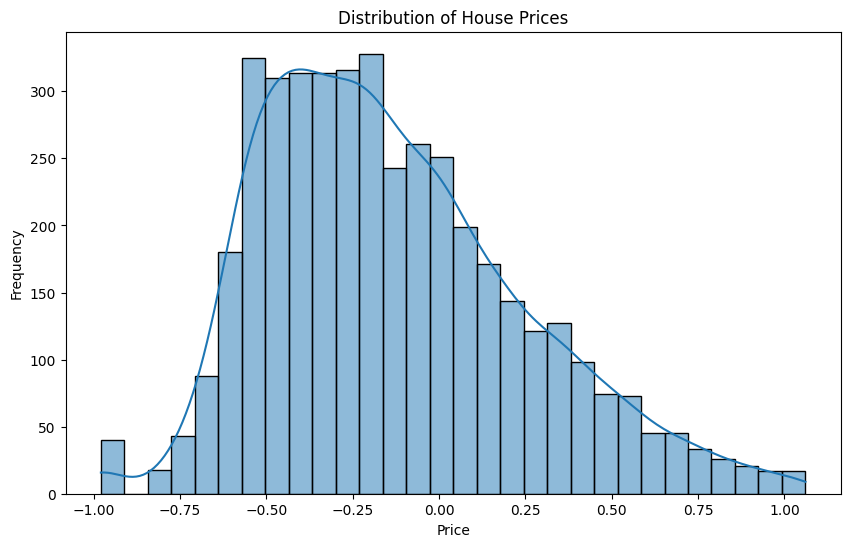

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

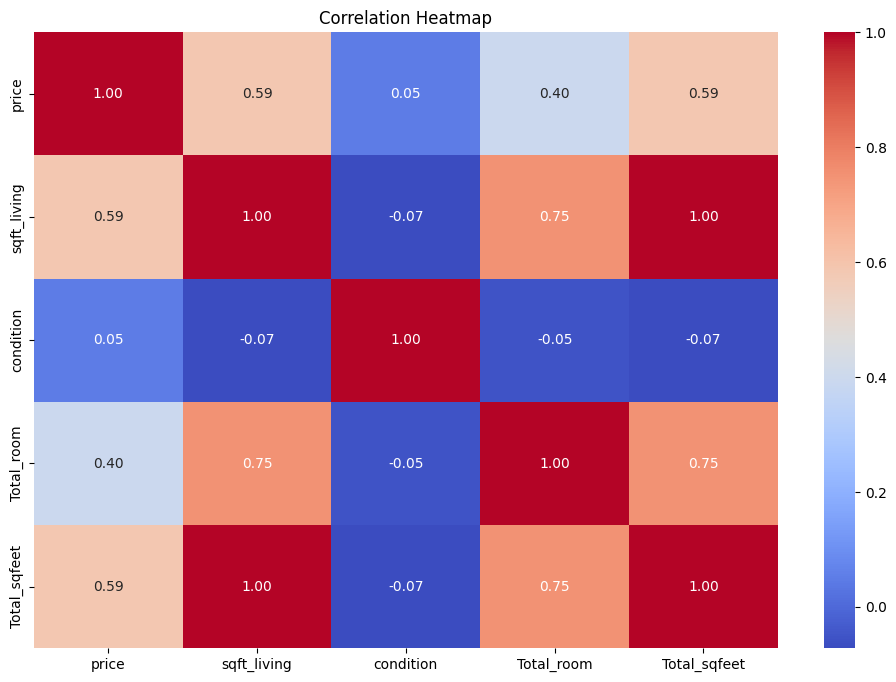

In [30]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()